In [17]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the specific file in the dataset
file_path = "Churn_Modelling.csv"  # Update this with the actual file name

# Load the dataset into a Pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shrutimechlearn/churn-modelling",
    file_path
)

# Print the first 5 records
print("First 5 records:\n", df.head())


C:\Users\offic\AppData\Local\Temp\ipykernel_9236\3717594368.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63      

In [18]:
import pandas as pd 

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [23]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

In [29]:
# df.head()
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5053,636,1,0,28,2,115265.14,1,0,0,191627.85,0
5508,656,0,0,75,3,0.00,2,1,1,1276.87,0
6566,525,1,0,30,0,157989.21,2,1,1,100687.67,0
8269,611,0,0,53,7,0.00,2,0,1,156495.39,1
1685,613,1,0,20,0,117356.19,1,0,0,113557.70,1


In [31]:
pd.get_dummies(df,columns=['Geography'],drop_first=True)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [32]:
X = df.drop(columns = ['Exited'],axis=1).values
y = df['Exited'].values

In [33]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [34]:
    y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X = scaler.fit_transform(X)

In [38]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(11, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             121 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50,verbose = 1, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4796 - loss: 0.7620 - val_accuracy: 0.7744 - val_loss: 0.5363
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7886 - loss: 0.5136 - val_accuracy: 0.7969 - val_loss: 0.4764
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 0.4705 - val_accuracy: 0.7969 - val_loss: 0.4570
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7989 - loss: 0.4496 - val_accuracy: 0.7994 - val_loss: 0.4459
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7988 - loss: 0.4471 - val_accuracy: 0.8050 - val_loss: 0.4381
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8053 - loss: 0.4362 - val_accuracy: 0.8119 - val_loss: 0.4328
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8160 - loss: 0.4248 - val_accuracy: 0.8144 - val_loss: 0.4282
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8135 - loss: 0.4263 - val_accu

In [56]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Converts probabilities to 0 or 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [57]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy


In [58]:
import matplotlib.pyplot as plt

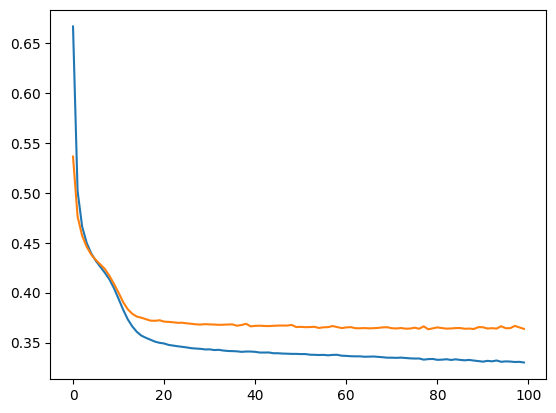

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [63]:
history.history

{'accuracy': [0.6201562285423279,
  0.792187511920929,
  0.7957812547683716,
  0.7965624928474426,
  0.8029687404632568,
  0.8104687333106995,
  0.8168749809265137,
  0.819531261920929,
  0.8235937356948853,
  0.831250011920929,
  0.8389062285423279,
  0.8456249833106995,
  0.8464062213897705,
  0.8506249785423279,
  0.8526562452316284,
  0.8557812571525574,
  0.85546875,
  0.8568750023841858,
  0.8584374785423279,
  0.858593761920929,
  0.8590624928474426,
  0.858593761920929,
  0.8573437333106995,
  0.8584374785423279,
  0.8598437309265137,
  0.8568750023841858,
  0.8592187762260437,
  0.8582812547683716,
  0.8587499856948853,
  0.8590624928474426,
  0.8595312237739563,
  0.8607812523841858,
  0.8610937595367432,
  0.8595312237739563,
  0.8595312237739563,
  0.859375,
  0.860156238079071,
  0.8610937595367432,
  0.8595312237739563,
  0.8598437309265137,
  0.8596875071525574,
  0.860156238079071,
  0.860156238079071,
  0.8600000143051147,
  0.8618749976158142,
  0.8600000143051147,
  

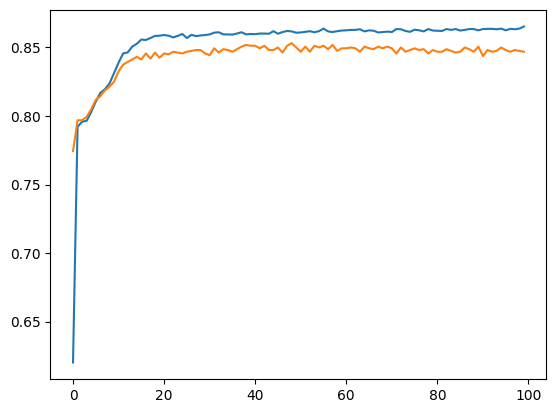

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])